In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

fm.fontManager.addfont("D2Coding.ttc")

plt.rcParams["font.family"] = "D2Coding"

# Linear Algebra Homework 5: Image Resampling

이미지를 읽고, 그걸 Bilinear Interpolation을 이용하여 Resampling 하면 된다.

사용할 이미지는 아래와 같다. $(h, w) = (1000, 1000)$

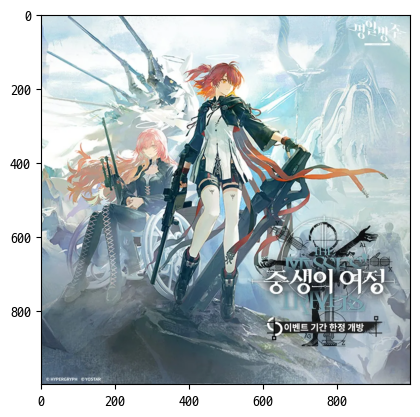

In [ ]:
img = Image.open("image.png")

img_arr = np.array(img)

def img_crop(arr: np.ndarray, from_h, to_h, from_w, to_w):
    h, w, _ = arr.shape
    return arr[int(h * from_h): int(h * to_h), int(w * from_w): int(w * to_w), :]

plt.imshow(img)

plt.show()

## Bilinear Interpolation Method

두 방향으로 두번의 선형 보간을 거치는 방법이다.

구현은 아래와 같이 하였다.

In [25]:
def bilinear_interpolation(arr: np.ndarray, new_h, new_w):
    h, w, c = arr.shape
    resized_arr = np.zeros((new_h, new_w, c), dtype=arr.dtype)

    for i in range(new_h):
        for j in range(new_w):
            x = i * (h - 1) / (new_h - 1)
            y = j * (w - 1) / (new_w - 1)

            x1 = int(x)
            x2 = min(x1 + 1, h - 1)
            y1 = int(y)
            y2 = min(y1 + 1, w - 1)

            a = x - x1
            b = y - y1

            for k in range(c):
                resized_arr[i, j, k] = (
                    (1 - a) * (1 - b) * arr[x1, y1, k]
                    + a * (1 - b) * arr[x2, y1, k]
                    + (1 - a) * b * arr[x1, y2, k]
                    + a * b * arr[x2, y2, k]
                )
    return resized_arr

위에 제시된 이미지를 2배 scale하여 $(h', w') = (2000, 2000)$이 되도록 리샘플링해주었다.

In [ ]:
img_new_arr = bilinear_interpolation(img_arr, int(img_arr.shape[0] * 2), int(img_arr.shape[1] * 2))
Image.fromarray(img_new_arr).save("image_bilinear.png")

결과 이미지:

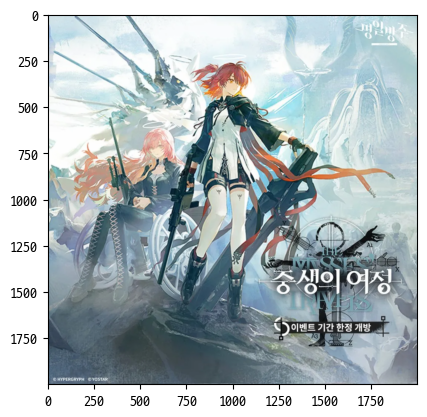

In [40]:
plt.imshow(img_new_arr)
plt.show()

## 결과

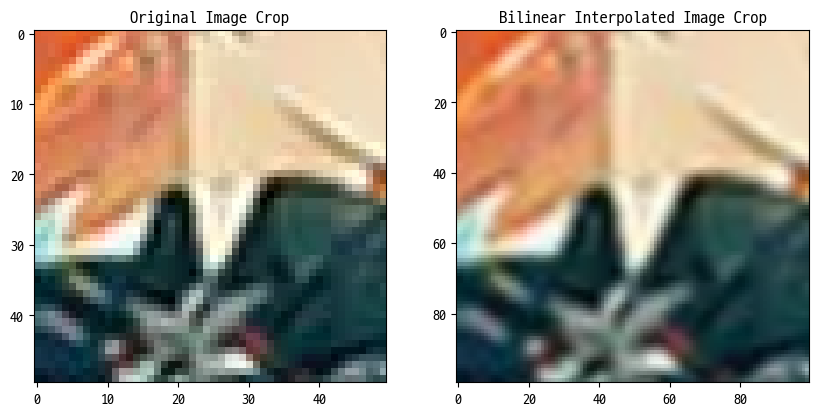

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title("Original Image Crop")
ax[0].imshow(img_crop(img_arr, 0.2, 0.25, 0.45, 0.5))

ax[1].set_title("Bilinear Interpolated Image Crop")
ax[1].imshow(img_crop(img_new_arr, 0.2, 0.25, 0.45, 0.5))

plt.show()

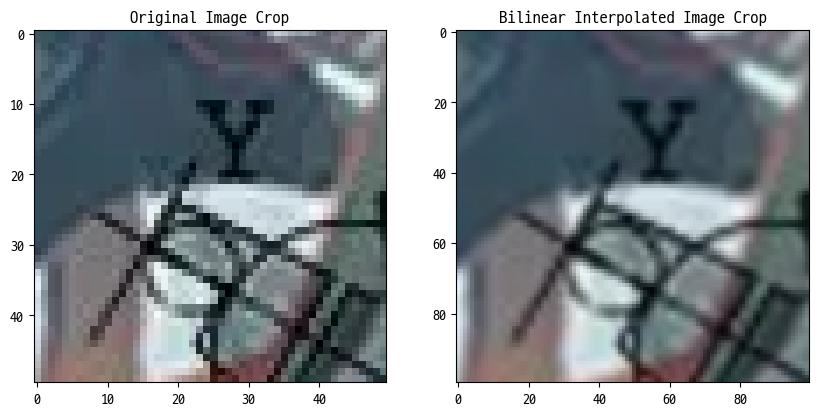

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title("Original Image Crop")
ax[0].imshow(img_crop(img_arr, 0.55, 0.60, 0.61, 0.66))

ax[1].set_title("Bilinear Interpolated Image Crop")
ax[1].imshow(img_crop(img_new_arr, 0.55, 0.60, 0.61, 0.66))

plt.show()